### toy perceptron

the idea of nn is quite simple and straightforward
taking the input, excite neurons and produce adenosine
then it comes down to reduce noises (optimization) 
and the speed (optimization again for network converge)
most of the business problems does not require CNN or RNN
rather solved by single or double hidden layer of
vanilla neural networks

```
y = wx + b + E
```

train a model from iris, to keep it simple, two class prediction (first 100 obs.)
Species ~ Sepal.Length + Sepal.Width 

In [443]:
x <- as.matrix(unname(head(iris[,1:2], 100)), nrow=100, ncol=2)
x <- scale(x)

In [444]:
y <- as.matrix(append(rep(1, 50), rep(-1, 50)), nrow=100, ncol=1)

In [445]:

  EPOCH  <- 100      
  n.obs  <- nrow(x)                                                                                                  
  n.parm <- ncol(x)                                               

  alpha  <- .01                                                  
  y.hat  <- rep(0, n.obs)                                      
  prob   <- rep(0, n.obs)                                       
  loss   <- rep(0, n.iter)                                      
  w      <- as.matrix(rnorm(n.parm) * .01, nrow=n.parm)
  b      <- rnorm(1)*.01                                      
                                     
                                                                
  eps    <- 1e-15                                               

In [446]:
for(e in 1:EPOCH){ 
    p     <- tanh(x %*% w + b)
                                                                 
    prob  <- ifelse(p>0, p, 1+p)                              
    prob  <- pmin(pmax(prob, 1e-15), 1-1e-15)              
    y.hat <- sign(p)                                       
  
    eta   <- y - y.hat                                   
    loss[e] <- -(mean(y * log(prob) + (1 - y) * log(1 - prob))) 
    
    # ... this sucker DOES work 
    w <- w + t(t(eta) %*% x) * alpha
    
    b = b + sum(alpha * eta* b)
    
}                                                 

In [447]:
  cat("Results for last iteration:", i, "\n")                       # show 'n tell
  cat("w1 = ", w[1], "\n")                                          # weights of last iteration      
  cat("w2 = ", w[2], "\n")                                          #
  cat("bias = ", b, "\n")                                           # bias of last iteration
  cat("Misclassification rate:", sum(y.hat != y)/n.obs, "\n")       # misclassification rate of last iteration

Results for last iteration: 2 
w1 =  -1.260583 
w2 =  1.090799 
bias =  0.003224259 
Misclassification rate: 0 


     y
y.hat -1  1
   -1 50  0
   1   0 50

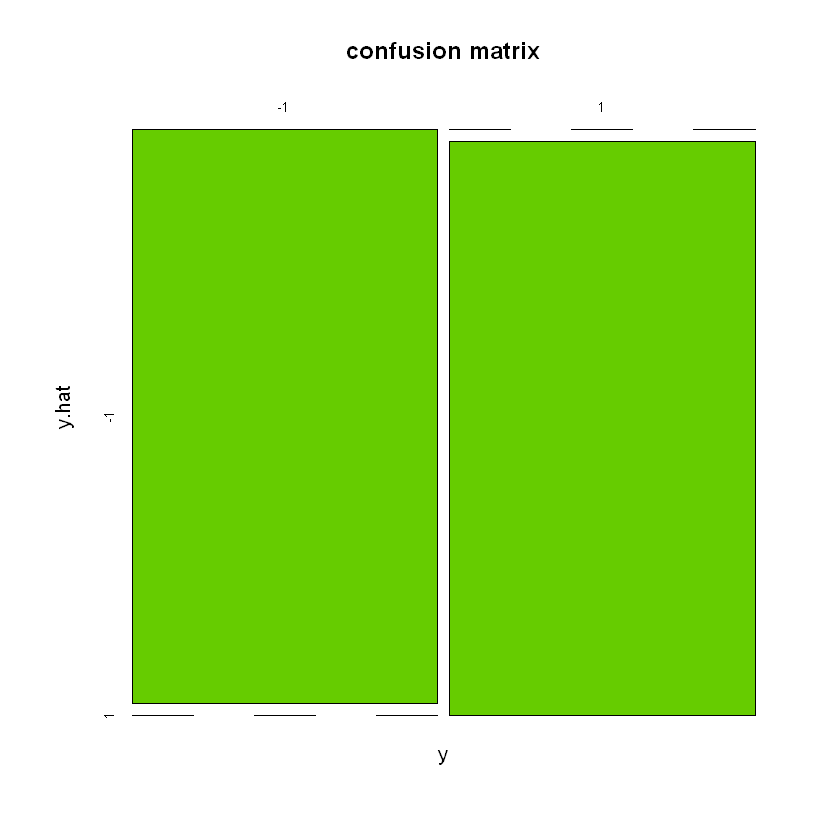

In [448]:
  table(y.hat, y)
  plot(table(y, y.hat), color="#66cc00", main="confusion matrix")   # confusion matrix of last iteration

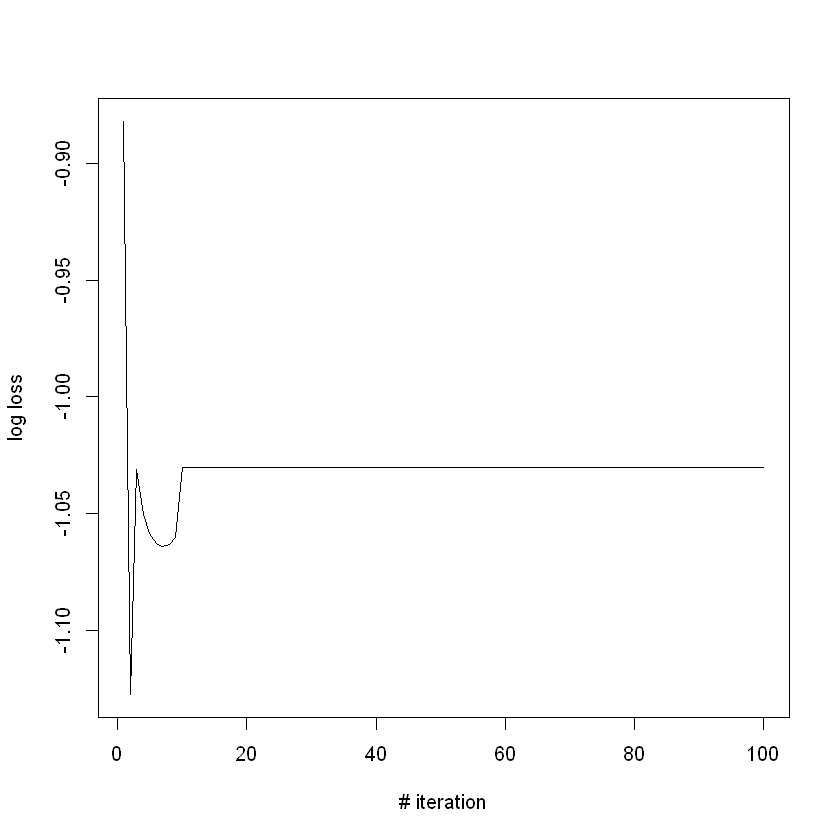

In [449]:
  plot(loss, xlab="# iteration", ylab="log loss", type="l")         # log loss plot to see convergence 